# Basic analysis of our dataset

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

datasetFolder = 'dataset/'

# Load the CSV files
movies = pd.read_csv(datasetFolder+'movies.csv')
ratings = pd.read_csv(datasetFolder+'ratings.csv')
tags = pd.read_csv(datasetFolder+'tags.csv')

# ratings.csv

Columns: ['userId', 'movieId', 'rating', 'timestamp']

userId:
- Number of unique users: 200948

rating:
- Number of ratings: 32000204 (32M)
- Average ratings per user: 159.25
- Average number of ratings per movie: 379.01
- Average rating: 3.54

movieId:
- Number of unique movies: 84432 (Not every movie mapped to movies.csv)

In [5]:
from collections import Counter

# Number of unique users
print(len(ratings['userId'].unique()))

# Number of ratings
print("Number of ratings:", ratings.shape[0])

# Average ratings per user
avgRatingsPerUser = Counter()
for user in ratings['userId']:
    avgRatingsPerUser[user] += 1
print("Average number of ratings per user:", np.mean(list(avgRatingsPerUser.values())))

# Average number of ratings per movie
avgRatingsPerMovie = Counter()
for movie in ratings['movieId']:
    avgRatingsPerMovie[movie] += 1
print("Average number of ratings per movie:", np.mean(list(avgRatingsPerMovie.values())))

# Average rating
mean_rating = np.mean(ratings['rating'])
print("Average rating:", mean_rating)

# Unique movies
print("Unique movies:", len(ratings['movieId'].unique()))

200948
Number of ratings: 32000204
Average number of ratings per user: 159.24619304496684
Average number of ratings per movie: 379.0056376729202
Average rating: 3.5403956487277393
Unique movies: 84432


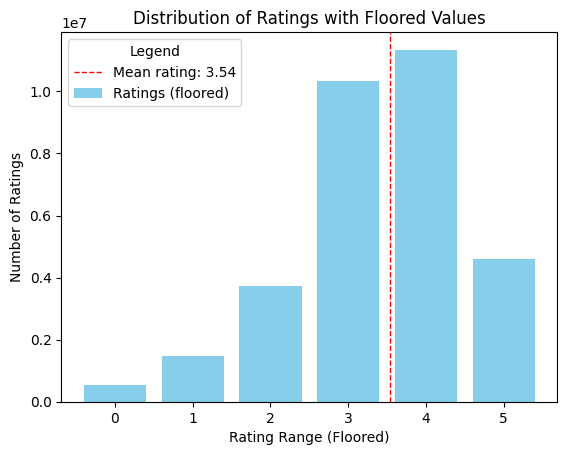

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Floor the ratings to the nearest lower integer
floored_ratings = np.floor(ratings['rating'])

# Define the rating bins for the histogram
bins = [0, 1, 2, 3, 4, 5, 6]  # Include 6 to capture "5" ratings fully

# Calculate the number of ratings within each floored range
ratings_distribution, _ = np.histogram(floored_ratings, bins=bins)

# Define labels for each bin
bin_labels = ['0', '1', '2', '3', '4', '5']

# Create the bar plot
plt.bar(bin_labels, ratings_distribution, color='skyblue', label="Ratings (floored)")

# Plot a vertical line for the mean
plt.axvline(x=mean_rating, color='red', linestyle='--', linewidth=1, label=f'Mean rating: {mean_rating:.2f}')

# Add axis labels, title, and legend
plt.xlabel('Rating Range (Floored)')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings with Floored Values')
plt.legend(title="Legend")

# Show plot
plt.show()

# movies.csv

Columns: ['movieId', 'title', 'genres']

movieId:
- Unique movies: 87585 (Not every movie used)

genres:
- Unique combinations of genres: 1798 (Movies can have multiple genres)
- Unique genres: 20
- Average genres per movie: 3.97

In [25]:
# Get unique movie count
print("Unique movie count:", movies.shape[0])

# Get unique genre combinations
uniqueGenreCombinations = movies["genres"].unique()
print("Number of unique genre combinations:", len(uniqueGenreCombinations))

# Average genres per movie
numGenres = [len(genreCombination.split('|')) for genreCombination in uniqueGenreCombinations]
print("Average genre count per movie:", np.mean(numGenres))

# Get unique genres
uniqueGenres = set()
for genreCombination in uniqueGenreCombinations:
    for genre in genreCombination.split('|'):
        uniqueGenres.add(genre)
print("Number of unique genres", len(uniqueGenres))

Unique movie count: 87585
Number of unique genre combinations: 1798
Average genre count per movie: 3.9688542825361512
Number of unique genres 20
